In [150]:
import pandas as pd
import warnings
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from random import sample as rs

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, silhouette_score


warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('../bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
2,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
3,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
4,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [22]:
len(data.columns)
data['education'].unique()

array(['secondary', 'unknown', 'tertiary', 'primary'], dtype=object)

In [25]:
for i in ['default', 'housing', 'loan']:
    print(data[i].unique())

['no' 'yes']
['yes' 'no']
['no' 'yes']


In [35]:
data.drop(columns=['pdays', 'previous'], inplace=True)

In [102]:
data.iloc[17965:17966]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
17965,45,entrepreneur,married,secondary,no,-479,yes,no,cellular,30,jul,167,2,unknown


In [42]:
new_df = data.copy()


In [152]:
# fact_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# for i in fact_column:
#     new_df[i] = pd.factorize(new_df[i])[0]

# new_df.head()

#scaler = StandardScaler()
sklr = MinMaxScaler()
X_scaled_standard = sklr.fit_transform(new_df[new_df.columns])

d_skl = pd.DataFrame(X_scaled_standard, index=new_df.index, columns=new_df.columns)

d_skl.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [153]:
x_train, x_test = train_test_split(
    d_skl, 
    test_size = 0.2, 
    random_state = 42
)

x_train_sample, x_test_sample = train_test_split(
    d_skl,
    test_size = 0.7,
    random_state = 42
)
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
11677,0.155844,0.363636,0.5,0.666667,0.0,0.073112,0.0,1.0,0.0,0.633333,0.090909,0.048394,0.032258,0.0
3344,0.545455,0.181818,0.5,1.000000,0.0,0.107485,1.0,0.0,0.0,0.466667,0.000000,0.037820,0.000000,0.0
17965,0.350649,0.090909,0.5,0.000000,0.0,0.068455,0.0,0.0,0.5,0.966667,0.181818,0.033957,0.016129,0.0
18299,0.363636,0.545455,0.0,0.000000,0.0,0.075273,1.0,0.0,0.5,1.000000,0.181818,0.030297,0.048387,0.0
10221,0.272727,0.545455,0.0,0.666667,0.0,0.073012,1.0,0.0,0.0,0.333333,0.090909,0.032940,0.032258,0.0


In [154]:
x_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13563 entries, 35791 to 15795
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13563 non-null  float64
 1   job        13563 non-null  float64
 2   marital    13563 non-null  float64
 3   education  13563 non-null  float64
 4   default    13563 non-null  float64
 5   balance    13563 non-null  float64
 6   housing    13563 non-null  float64
 7   loan       13563 non-null  float64
 8   contact    13563 non-null  float64
 9   day        13563 non-null  float64
 10  month      13563 non-null  float64
 11  duration   13563 non-null  float64
 12  campaign   13563 non-null  float64
 13  poutcome   13563 non-null  float64
dtypes: float64(14)
memory usage: 1.6 MB


In [155]:
sil_score = []
inertia = []
for i in range(10, 30):
    model = KMeans(n_clusters=i, n_init = 'auto',random_state = 42,)
    sil_score.append(silhouette_score(x_train_sample, model.fit_predict(x_train_sample)))
    inertia.append(model.inertia_)

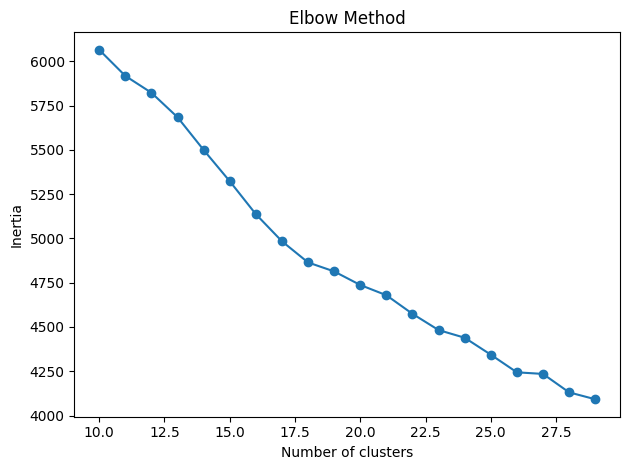

In [156]:
plt.plot(range(10, 30), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.tight_layout()
plt.show()

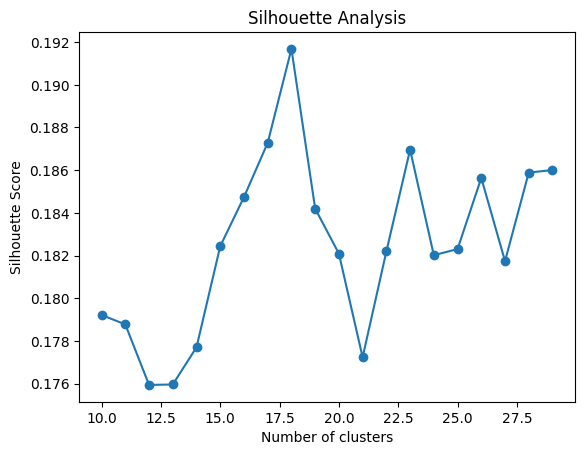

In [157]:
plt.plot(range(10, 30), sil_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [158]:
kmeans_model = KMeans(
    n_clusters = 11,
    n_init = 'auto',
    random_state = 42,
)

kmeans_model.fit(x_train)

KMeans(n_clusters=11, random_state=42)

In [159]:
pred = kmeans_model.predict(x_train)

In [160]:
silhouette_score(x_train, pred)

0.18615213845675938

In [161]:
kmeans_model.inertia_

16231.28864669139

In [162]:
y_train = list(kmeans_model.labels_)
x_train["cluster"] = y_train
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,cluster
11677,0.155844,0.363636,0.5,0.666667,0.0,0.073112,0.0,1.0,0.0,0.633333,0.090909,0.048394,0.032258,0.0,9
3344,0.545455,0.181818,0.5,1.000000,0.0,0.107485,1.0,0.0,0.0,0.466667,0.000000,0.037820,0.000000,0.0,2
17965,0.350649,0.090909,0.5,0.000000,0.0,0.068455,0.0,0.0,0.5,0.966667,0.181818,0.033957,0.016129,0.0,1
18299,0.363636,0.545455,0.0,0.000000,0.0,0.075273,1.0,0.0,0.5,1.000000,0.181818,0.030297,0.048387,0.0,6
10221,0.272727,0.545455,0.0,0.666667,0.0,0.073012,1.0,0.0,0.0,0.333333,0.090909,0.032940,0.032258,0.0,2


In [163]:
len(x_train[x_train['cluster'] == 0])

3192

<Axes: xlabel='age', ylabel='balance'>

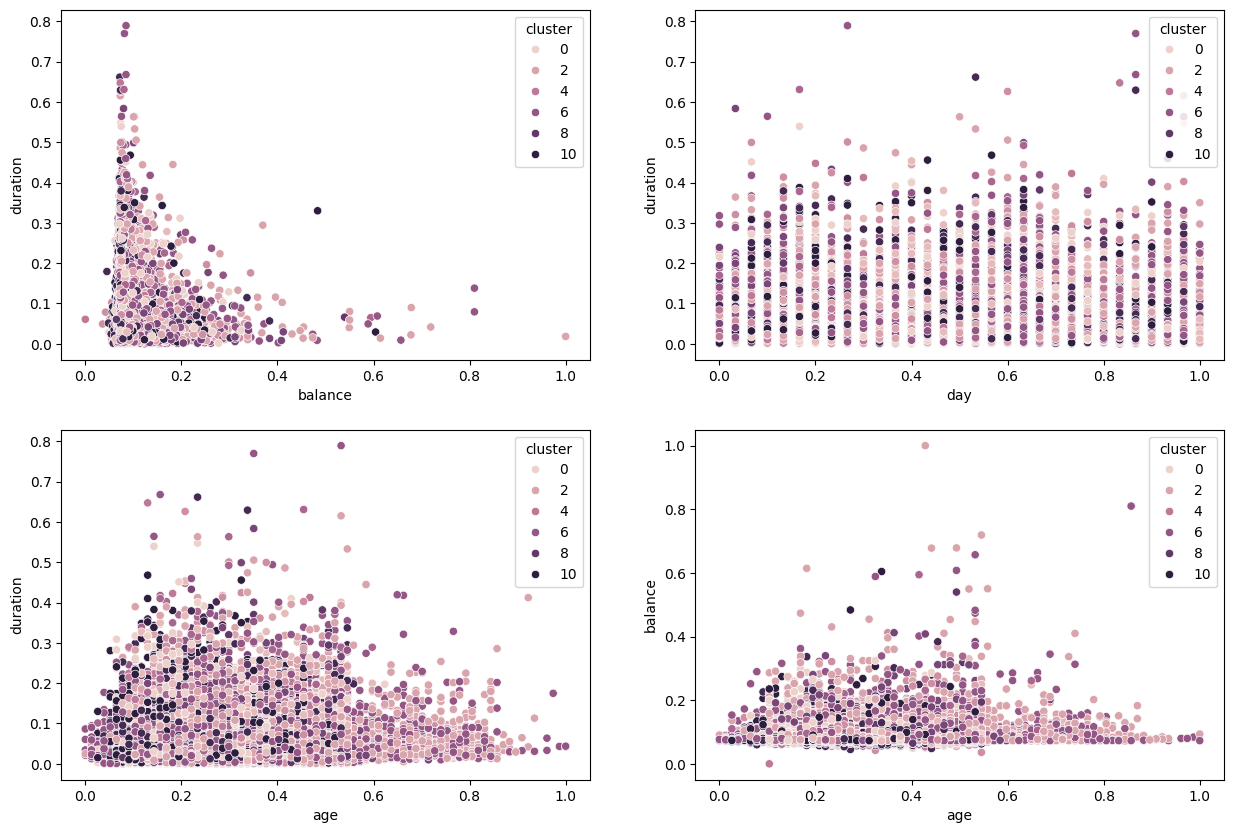

In [164]:
fig, axis = plt.subplots(2, 2, figsize=(15,10))

sns.scatterplot(ax = axis[0][0],data = x_train, x = 'balance', y = 'duration', hue='cluster')
sns.scatterplot(ax = axis[0][1],data = x_train, x = 'day', y = 'duration', hue='cluster')
sns.scatterplot(ax = axis[1][0],data = x_train, x = 'age', y = 'duration', hue='cluster')
sns.scatterplot(ax = axis[1][1],data = x_train, x = 'age', y = 'balance', hue='cluster')